## Problem Statement
## Here we will Analyse Employee churn.Why employees are leaving the company. Predict who will leave the company.

Employee churn can be affected by salary, work conditions, job satisfaction, tenure, growth potential. There are many advantages of retaining a employee rather than hiring new one. Like hiring new employees has its cost like hiring and training cost. New employee also will take some time to attain the similar skills as the experience employee.

Given that we have data on employees with 0 (active employee), 1 (former employee). In this study, our target variable y is the probability of an employee leaving the company.

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Import Data

In [3]:
df = pd.read_excel('WA_Fn-UseC_-HR-Employee-Attrition.xlsx')


In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
print("Shape of dataframe is: {}".format(df.shape))

Shape of dataframe is: (1470, 35)


In [9]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# Checking dataset columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Viewing the data statistics

In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


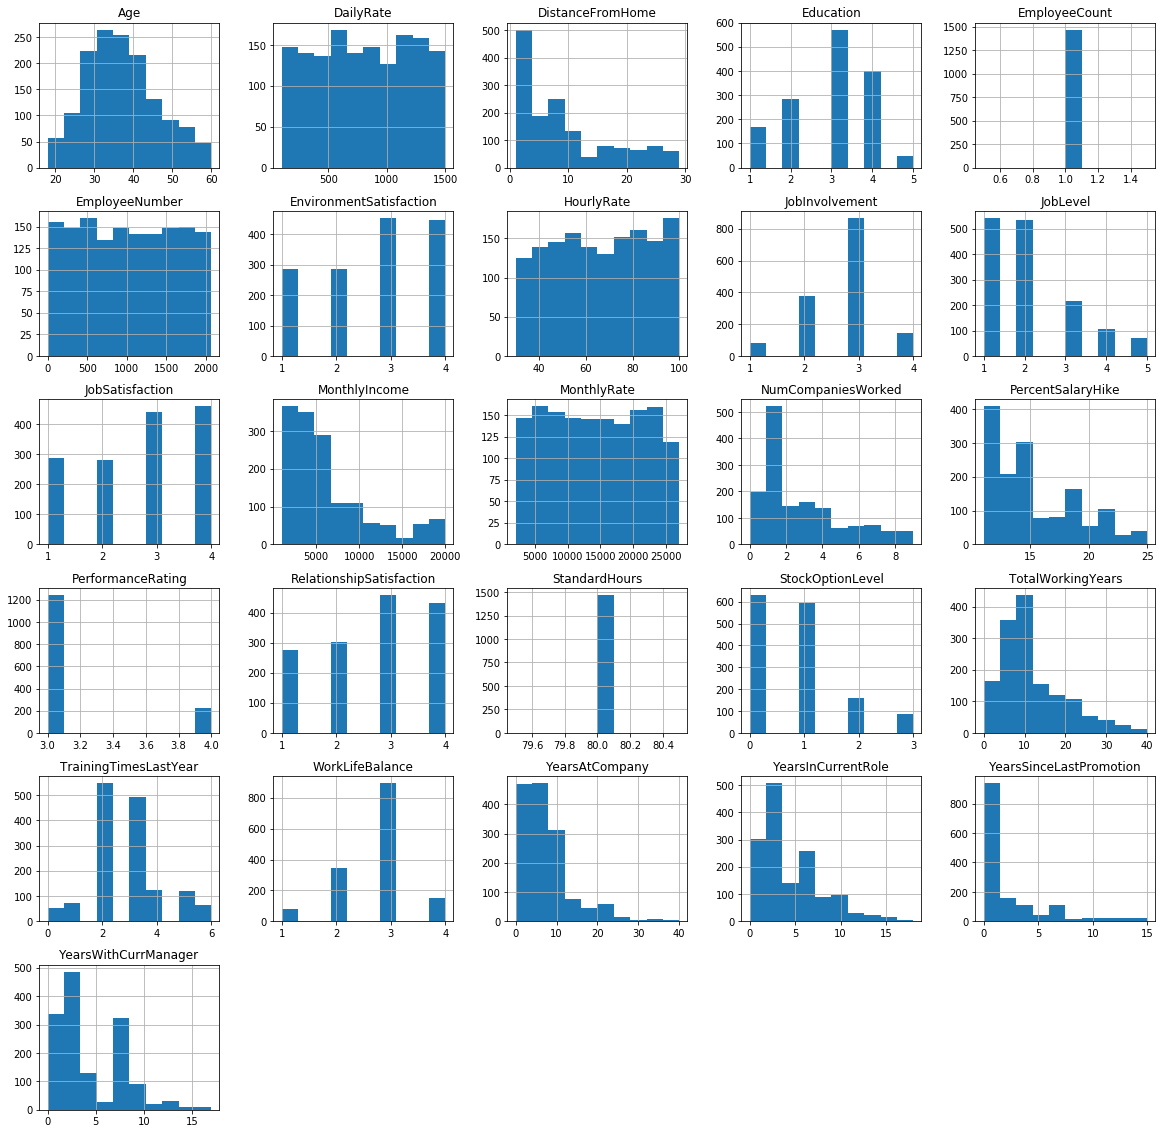

In [11]:
df.hist(figsize=(20,20))
plt.show()

Observations:

Age distribution is for the bulk of the staff between 25 and 45 years old.

EmployeeCount and StandardHours are same for all the employees. 

So they're likely to be redundant features.

On the other hand employee Number is likely to be a unique identifier for employees.

In [12]:
# Education Field of employees
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

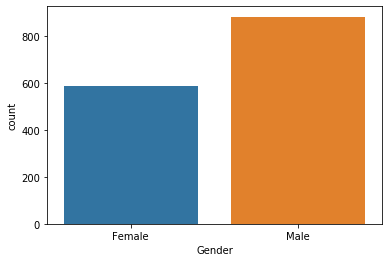

In [13]:
sns.countplot(x ="Gender", data = df)

Gender distribution shows that the dataset features a higher relative proportion of male employees than female employees.

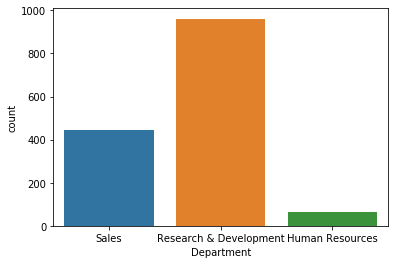

In [14]:
sns.countplot(x ="Department", data = df)

The dataset employee from three departments: Research & Development, Sales, and Human Resources.

In [16]:
# Employees in the company have several different roles
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [17]:
df['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [18]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

All employees have a standard 80-hour work commitment.

In [19]:
df['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [20]:
df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

Employee Performance Rating was captured as:

1 -Low 

2 - Good

3 - Excellent

4 - Outstanding

All the employees in the company have performed the excellent and outstanding only.

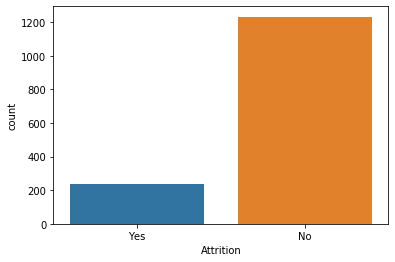

In [21]:
sns.countplot(x ="Attrition", data = df)

The attrition is the target variable which we want our model to predicts.

# Plotting the heatmap of correlation between features

In [22]:
# Converting Attrition attribute into numbers.
df['Output'] = df['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

In [23]:
# Also we will drop the fetures which is not the useful for prediction
df = df.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

In [24]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(24, 24)

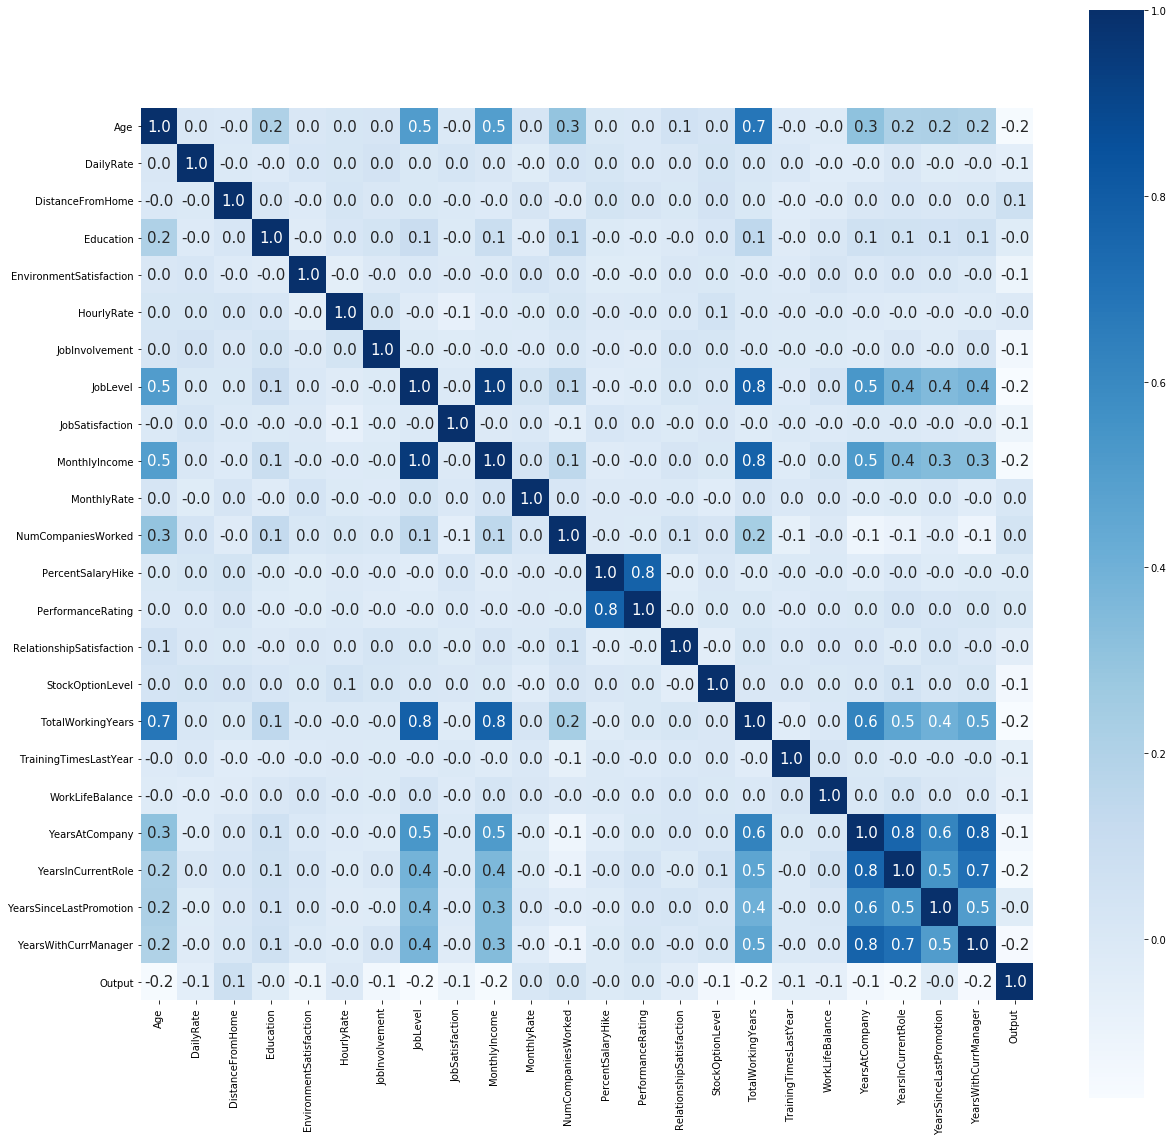

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

Observations:

We observe that the attributes Monthly Rate, Number of Companies Worked and Distance From Home are positively correlated to Attrition. 

While job level, total working experience are negatiely correlated with output variable.
 
Preprocessing the data 

Here we preprocess data to prepare for Machine Learning algorithm.

As we have lots of categorical features with different values we will use LabelEncoder for coverting this featurres into numbers.

# dropping TAX, NOX and DIS

In [27]:
# Create a label encoder object
le = LabelEncoder()
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        le.fit(df[col])
        df[col] = le.transform(df[col])
df.shape
(1470, 31)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Output
0,41,2,1102,2,1,2,1,2,0,94,...,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,3,1,61,...,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,1,92,...,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,4,0,56,...,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,1,40,...,4,1,6,3,3,2,2,2,2,0


Separating data into X and y for prediction.

In [28]:
y =df['Output']
X =df.drop("Output" , axis =1)

Feature Scaling

Feature Scaling is a technique where we shrinks the range such that the range is now between 0 and 1.

In [29]:
s = StandardScaler()
X = s.fit_transform(X)
print(np.mean(X))
np.std(X)

7.713658384243717e-18


0.9999999999999999

# Splitting to training and testing data

In [30]:
X_train ,X_test, y_train,y_test =train_test_split(X ,y, test_size =0.3)


# Create a Model

In [31]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
## Predict Train set results
y_train_pred = model.predict(X_train)

In [33]:
## Predict Test set results
y_pred = model.predict(X_test)

In [34]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

# Display first 10 predictions
y_pred_proba[:10]

array([0.43556028, 0.1237736 , 0.04276618, 0.19530632, 0.01073268,
       0.36329491, 0.06612836, 0.00288778, 0.05685732, 0.24548997])

Note:

The probality values represent the probability of a data point belonging to class 1
For example:

In [35]:
i=213  ## Change the value of i to get the details of any point (56, 213, etc.)
print('For test point {}, actual class = {}, predited class = {}, predicted probability = {}'.
      format(i, y_test.iloc[i], y_pred[i], y_pred_proba[i]))

For test point 213, actual class = 1, predited class = 1, predicted probability = 0.9049916208783853


These probabilistic outputs are very important for understanding how confident the model is about the prediction.

Probabilities near 0 or 1 means the model is very confident and those near 0.5 means the model is not very confident about the prediction.

In [36]:
confusion_matrix(y_test, y_pred).T

array([[350,  42],
       [ 25,  24]])

The default value of the C logistic regression is 1. Now let's try some other values for it also.

In [37]:
model = LogisticRegression(C = 0.01)
model.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
## Predict Train set results
y_train_pred = model.predict(X_train)

## Predict Test set results
y_pred = model.predict(X_test)

In [39]:
confusion_matrix(y_test, y_pred).T

array([[373,  58],
       [  2,   8]])

In [40]:
model = LogisticRegression(C = 10)
model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
## Predict Train set results
y_train_pred = model.predict(X_train)

## Predict Test set results
y_pred = model.predict(X_test)

In [42]:
confusion_matrix(y_test, y_pred).T

array([[349,  42],
       [ 26,  24]])

As you can see that the above confusion matrix is same as that of confusion matrix with C = 1. So increasing the value of C will definately helps us.